# <font color = "Blue"> Marketing Insight</font>

### Importing Data and Packages

In [24]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

from datetime import datetime
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)


In [25]:
import os 
os.getcwd()

#od.chdir('g:\\FullStack AI\\Machine Learning Projects\\Marketing Insights\\Dataset')

'g:\\FullStack AI\\Machine Learning Projects\\Marketing Insights'

In [39]:
customer =pd.read_excel("Datasets\\CustomersData.xlsx")
discount= pd.read_csv('Datasets\\Discount_Coupon.csv')
market_spend=  pd.read_csv("Datasets\\Marketing_Spend.csv")
online_sales = pd.read_csv("Datasets\\Online_Sales.csv") # 
tax_amount = pd.read_excel("Datasets\\Tax_amount.xlsx")

#### Renaming discount Column Name

In [40]:
discount.rename(columns={ 'Product_Category ':'Product_Category'},inplace=True) 

In [41]:
discount.head(1)

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10


In [42]:
customer.head(1)

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12


In [43]:
tax_amount.head(2)

,Product_Category,GST
0,Nest-USA,0.1
1,Office,0.1


In [44]:
market_spend.head(1)

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.5


In [32]:
online_sales.head(1)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used


In [45]:
online_sales.Transaction_Date = pd.to_datetime(online_sales.Transaction_Date, format='%Y%m%d')

In [46]:
online_sales['Month'] = online_sales.Transaction_Date.dt.strftime('%b')

In [47]:
data = pd.merge(tax_amount,discount,how='inner', on ='Product_Category')

In [48]:
data.head(2)

,Product_Category,GST,Month,Coupon_Code,Discount_pct
0,Nest-USA,0.1,Jan,ELEC10,10
1,Nest-USA,0.1,Feb,ELEC20,20


In [49]:
data= pd.merge(online_sales,data,on=['Product_Category','Month'],how='left')

In [50]:
data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.10,ELEC10,10.0
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.10,ELEC10,10.0
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,0.10,OFF10,10.0
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,0.18,SALE10,10.0
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,0.18,AIO10,10.0


## Building Customer 360 DataSet

In [51]:
data.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,ELEC10,10.0
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,ELEC10,10.0


In [52]:
data = pd.merge(customer,data,on='CustomerID',how='left')

In [53]:
data.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Coupon_Code,Discount_pct
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.10,ELEC10,10.0
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.10,ELEC10,10.0
2,17850,M,Chicago,12,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,0.10,OFF10,10.0
3,17850,M,Chicago,12,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,0.18,SALE10,10.0
4,17850,M,Chicago,12,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,0.18,AIO10,10.0


In [54]:
data.shape

(52924, 17)

#### Dropping Missing Values 

In [55]:
data.isna().sum()

CustomerID               0
Gender                   0
Location                 0
Tenure_Months            0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
Month                    0
GST                    400
Coupon_Code            400
Discount_pct           400
dtype: int64

In [56]:
data.dropna(inplace=True)

In [57]:
data.isna().sum()

CustomerID             0
Gender                 0
Location               0
Tenure_Months          0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
Month                  0
GST                    0
Coupon_Code            0
Discount_pct           0
dtype: int64

#### General Analysis of the Data

In [58]:
data.Transaction_ID.value_counts().shape

(25000,)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52524 entries, 0 to 52923
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  int64         
 1   Gender               52524 non-null  object        
 2   Location             52524 non-null  object        
 3   Tenure_Months        52524 non-null  int64         
 4   Transaction_ID       52524 non-null  int64         
 5   Transaction_Date     52524 non-null  datetime64[ns]
 6   Product_SKU          52524 non-null  object        
 7   Product_Description  52524 non-null  object        
 8   Product_Category     52524 non-null  object        
 9   Quantity             52524 non-null  int64         
 10  Avg_Price            52524 non-null  float64       
 11  Delivery_Charges     52524 non-null  float64       
 12  Coupon_Status        52524 non-null  object        
 13  Month                52524 non-

# <font color ="Maroon"> Exploratory Data Analysis</font>

## 1. Calculate Invoice amount  or sale_amount  or revenue for each transaction and item level<br>
• Invoice Value = (( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST)) + Delivery_Charges 

In [60]:
data.head(1)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Coupon_Code,Discount_pct
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,ELEC10,10.0


In [61]:
data['Invoice_Amount']=((data['Quantity']* data['Avg_Price'])*(1 -(data['Discount_pct']) *0.01)*(1+data['GST']))+data['Delivery_Charges']

In [62]:
data['Invoice_Amount']

0        158.67290
1        158.67290
2          8.52950
3         99.58430
4         24.02300
           ...    
52919     99.90100
52920     46.90792
52921    123.44760
52922    316.50200
52923    267.99160
Name: Invoice_Amount, Length: 52524, dtype: float64

### Transaction Level

In [66]:
transaction_level =data.pivot_table( index=['Transaction_ID'], values=['Avg_Price','Delivery_Charges','GST','Discount_pct'],aggfunc='sum')

In [67]:
transaction_level

,Avg_Price,Delivery_Charges,Discount_pct,GST
Transaction_ID,,,,
16679,153.71,6.50,10.0,0.10
16680,153.71,6.50,10.0,0.10
16681,2.05,6.50,10.0,0.10
16682,84.33,65.00,100.0,1.56
16684,204.27,13.00,20.0,0.20
...,...,...,...,...
48493,121.30,6.50,30.0,0.10
48494,48.92,6.50,30.0,0.18
48495,151.88,6.50,30.0,0.10


In [ ]:
GST','Discount_pct'],aggfunc='sum'

In [69]:
prod_level = data.pivot_table( index=['Transaction_ID','Product_SKU'], values=['Quantity','Avg_Price','Delivery_Charges','Discount_pct','GST'],aggfunc='sum')

In [70]:
prod_level

Avg_Price  Delivery_Charges  Discount_pct  \
Transaction_ID Product_SKU                                                 
16679          GGOENEBJ079499     153.71              6.50          10.0   
16680          GGOENEBJ079499     153.71              6.50          10.0   
16681          GGOEGFKQ020399       2.05              6.50          10.0   
16682          GGOEGAAB010516      17.53              6.50          10.0   
               GGOEGBJL013999      16.50              6.50          10.0   
...                                  ...               ...           ...   
48493          GGOENEBB078899     121.30              6.50          30.0   
48494          GGOEGAEB091117      48.92              6.50          30.0   
48495          GGOENEBQ084699     151.88              6.50          30.0   
48496          GGOENEBQ079199      80.52              6.50          30.0   
48497          GGOENEBQ079099      80.52             19.99          30.0   

                                GST  Quantity  
Transaction_ID Product_SKU                     
16679          GGOENEBJ079499  0.10         1  
16680          GGOENEBJ079499  0.10         1  
16681          GGOEGFKQ020399  0.10         1  
16682          GGOEGAAB010516  0.18         5  
               GGOEGBJL013999  0.18         1  
...                             ...       ...  
48493          GGOENEBB078899  0.10         1  
48494          GGOEGAEB091117  0.18         1  
48495          GGOENEBQ084699  0.10         1  
48496          GGOENEBQ079199  0.10         5  
48497          GGOENEBQ079099  0.10         4  

[52524 rows x 5 columns]

In [71]:
prod_level["Invoice_Amount"] =  ((prod_level['Quantity']* prod_level['Avg_Price'])*(1 -(prod_level['Discount_pct']*0.01) )*(1+prod_level['GST']))+prod_level['Delivery_Charges']

In [72]:
prod_level

Avg_Price  Delivery_Charges  Discount_pct  \
Transaction_ID Product_SKU                                                 
16679          GGOENEBJ079499     153.71              6.50          10.0   
16680          GGOENEBJ079499     153.71              6.50          10.0   
16681          GGOEGFKQ020399       2.05              6.50          10.0   
16682          GGOEGAAB010516      17.53              6.50          10.0   
               GGOEGBJL013999      16.50              6.50          10.0   
...                                  ...               ...           ...   
48493          GGOENEBB078899     121.30              6.50          30.0   
48494          GGOEGAEB091117      48.92              6.50          30.0   
48495          GGOENEBQ084699     151.88              6.50          30.0   
48496          GGOENEBQ079199      80.52              6.50          30.0   
48497          GGOENEBQ079099      80.52             19.99          30.0   

                                GST  Quantity  Invoice_Amount  
Transaction_ID Product_SKU                                     
16679          GGOENEBJ079499  0.10         1       158.67290  
16680          GGOENEBJ079499  0.10         1       158.67290  
16681          GGOEGFKQ020399  0.10         1         8.52950  
16682          GGOEGAAB010516  0.18         5        99.58430  
               GGOEGBJL013999  0.18         1        24.02300  
...                             ...       ...             ...  
48493          GGOENEBB078899  0.10         1        99.90100  
48494          GGOEGAEB091117  0.18         1        46.90792  
48495          GGOENEBQ084699  0.10         1       123.44760  
48496          GGOENEBQ079199  0.10         5       316.50200  
48497          GGOENEBQ079099  0.10         4       267.99160  

[52524 rows x 6 columns]

2) Perform Detailed exploratory analysis 

    • Understanding how many customers acquired every month 
    • Understand the retention of customers on month on month basis 
    • How the revenues from existing/new customers on month on month basis 
    • How the discounts playing role in the revenues? 
    • Analyse KPI’s like Revenue, number of orders, average order value, number of 
    customers (existing/new), quantity, by category, by month, by week, by day etc... 
    • Understand the trends/seasonality of sales by category, location, month etc... 
    • How number order varies and sales with different days? 
    • Calculate the Revenue, Marketing spend, percentage of marketing spend out of 
    revenue, Tax, percentage of delivery charges by month. 
    • How marketing spend is impacting on revenue? 


• Understanding how many customers acquired every month 

In [73]:
data['year'] =data.Transaction_Date.dt.year

In [74]:
monthly_data = pd.pivot_table(data =data ,index=['Month'],columns=['CustomerID'], values =['year'],aggfunc='count',fill_value=0)


In [75]:
total_cust=[]
month_dict=dict()
monthly_aqus=dict()
for i in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
    if i=='Jan':
        month_dict[i]= list(set(data.loc[data.Month==i,'CustomerID'].tolist()))
        total_cust+month_dict[i]
    else:
        month_dict[i] = [ id for id in (list(set(data.loc[data.Month==i,'CustomerID'].tolist()))) if (id not in total_cust) ]
    total_cust = total_cust+month_dict[i]
    monthly_aqus[i]=len(month_dict[i])

In [76]:
monthly_aqus

{'Jan': 215,
 'Feb': 96,
 'Mar': 177,
 'Apr': 163,
 'May': 112,
 'Jun': 137,
 'Jul': 93,
 'Aug': 136,
 'Sep': 78,
 'Oct': 87,
 'Nov': 68,
 'Dec': 106}

In [77]:
monthly_acquisiton= pd.DataFrame({'Months':monthly_aqus.keys(),'Customers_Count':monthly_aqus.values()})
monthly_acquisiton

,Months,Customers_Count
0,Jan,215
1,Feb,96
2,Mar,177
3,Apr,163
4,May,112
5,Jun,137
6,Jul,93
7,Aug,136
8,Sep,78
9,Oct,87


In [78]:
data.CustomerID.nunique()

1468

In [79]:
monthly_acquisiton.sum(axis=0)

Months             JanFebMarAprMayJunJulAugSepOctNovDec
Customers_Count                                    1468
dtype: object

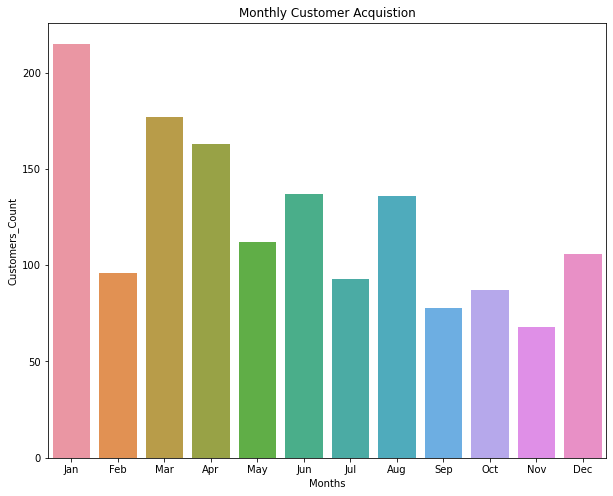

In [80]:
plt.figure(figsize=(10,8))
plt.title("Monthly Customer Acquistion")
sns.barplot(data=monthly_acquisiton,x=monthly_acquisiton['Months'],y=monthly_acquisiton['Customers_Count'])
plt.show()

• Understand the retention of customers on month on month basis 

In [81]:
total_cust=[]
month_dict=dict()
monthly_reten=dict()
for i in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
    if i=='Jan':
        month_dict[i]= list(set(data.loc[data.Month==i,'CustomerID'].tolist()))
        total_cust+month_dict[i]
    else:
        month_dict[i] = [ id for id in (list(set(data.loc[data.Month==i,'CustomerID'].tolist()))) if (id in total_cust) ]
    total_cust = total_cust+month_dict[i]
    monthly_reten[i]=len(month_dict[i])

In [82]:
monthly_retention= pd.DataFrame({'Months':monthly_reten.keys(),'Customers_Count':monthly_reten.values()})
#monthly_reten
monthly_retention= monthly_retention[monthly_retention['Months']!='Jan'] # Jan is the start of the month so removing 

In [83]:
monthly_retention

,Months,Customers_Count
1,Feb,13
2,Mar,24
3,Apr,34
4,May,23
5,Jun,44
6,Jul,35
7,Aug,47
8,Sep,23
9,Oct,28
10,Nov,20


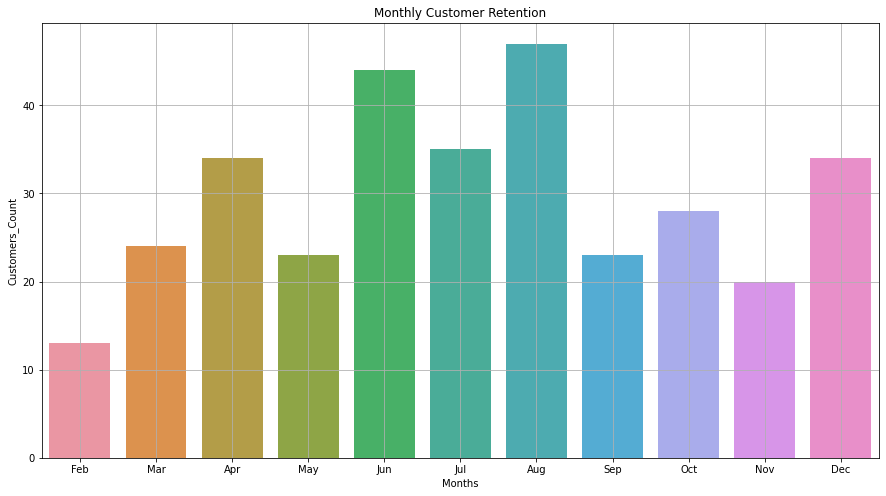

In [84]:
plt.figure(figsize=(15,8))
plt.title("Monthly Customer Retention")
sns.barplot(data=monthly_retention,x=monthly_retention['Months'],y=monthly_retention['Customers_Count'])
plt.grid()
plt.show()

• How the revenues from existing and new customers on month on month basis 

In [85]:
total_cust=[]
month_dict=dict()
#monthly_aqus=dict()
for i in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
    if i=='Jan':
        month_dict[i]= list(set(data.loc[data.Month==i,'CustomerID'].tolist()))
        total_cust+month_dict[i]
    else:
        month_dict[i] = [ i for i in (list(set(data.loc[data.Month==i,'CustomerID'].tolist()))) if (i not in total_cust) ]
    total_cust = total_cust+month_dict[i]
    #monthly_aqus[i]=len(month_dict[i])

In [86]:
new_revenue=dict()
for i,j in month_dict.items():    
    new_revenue[i] = round(data.loc[data['CustomerID'].isin(j),"Avg_Price"].sum(),2)
    

In [87]:
new_cust_revenue= pd.DataFrame( {'Month': new_revenue.keys(),'Revenue': new_revenue.values()})
new_cust_revenue

,Month,Revenue
0,Jan,585666.25
1,Feb,320931.36
2,Mar,361427.55
3,Apr,247335.05
4,May,205679.59
5,Jun,176371.79
6,Jul,144378.55
7,Aug,159205.40
8,Sep,85982.47
9,Oct,148991.99


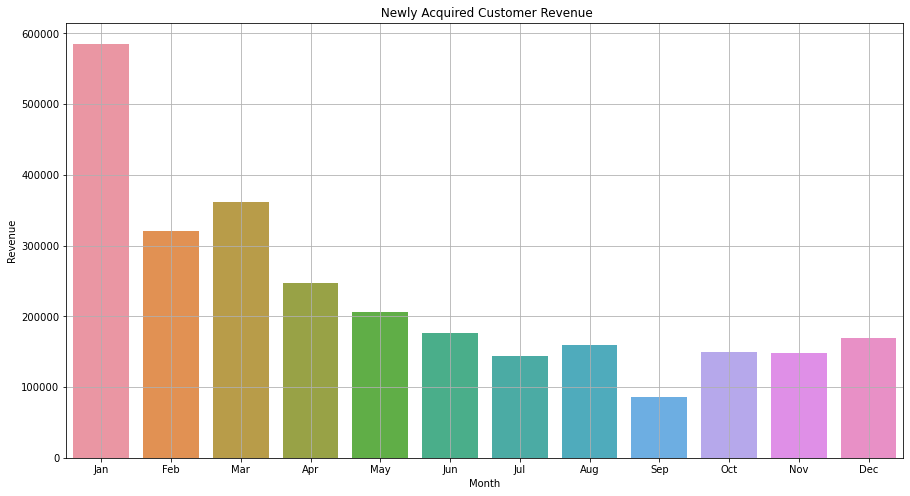

In [88]:
plt.figure(figsize=(15,8))
plt.title(" Newly Acquired Customer Revenue")
sns.barplot(data=new_cust_revenue,x=new_cust_revenue['Month'],y=new_cust_revenue['Revenue'])
plt.grid()
plt.show()

In [89]:
total_cust=[]
exist_dict=dict()
#monthly_aqus=dict()
for i in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
    if i=='Jan':
        exist_dict[i]= list(set(data.loc[data.Month==i,'CustomerID'].tolist()))
        total_cust+exist_dict[i]
    else:
        exist_dict[i] = [ id for id in (list(set(data.loc[data.Month==i,'CustomerID'].tolist()))) if (id in total_cust) ]
    total_cust = total_cust+month_dict[i]
    #monthly_aqus[i]=len(month_dict[i])

In [90]:
exist_revenue=dict()
for i,j in exist_dict.items():    
    exist_revenue[i] = round(data.loc[data['CustomerID'].isin(j),"Avg_Price"].sum(),2)

In [91]:
exist_revenue

{'Jan': 585666.25,
 'Feb': 178206.4,
 'Mar': 234954.24,
 'Apr': 300126.07,
 'May': 407670.08,
 'Jun': 491683.98,
 'Jul': 619038.26,
 'Aug': 587726.65,
 'Sep': 526217.89,
 'Oct': 492308.51,
 'Nov': 528418.81,
 'Dec': 556380.54}

In [92]:
exist_revenue_df= pd.DataFrame( {'Month': exist_revenue.keys(),'Revenue': exist_revenue.values()})
exist_revenue_df= exist_revenue_df[exist_revenue_df["Month"]!='Jan']

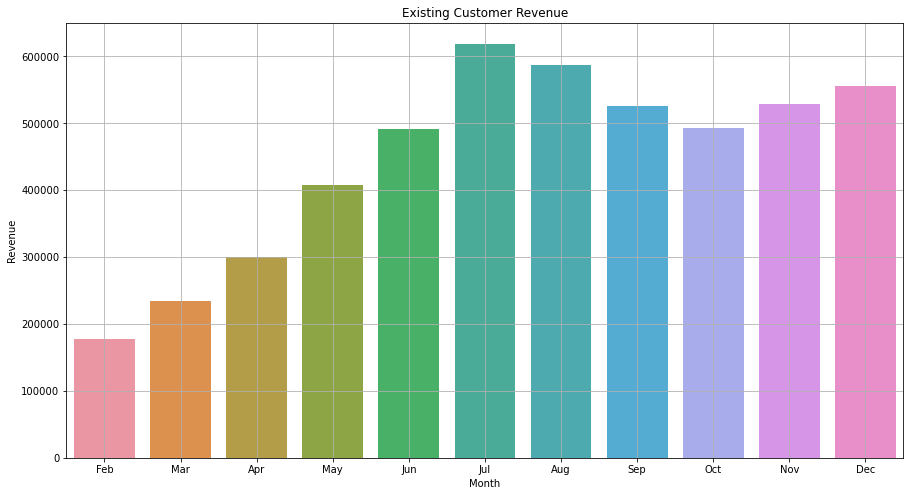

In [93]:
plt.figure(figsize=(15,8))
plt.title("Existing Customer Revenue")
sns.barplot(data=exist_revenue_df,x=exist_revenue_df['Month'],y=exist_revenue_df['Revenue'])
plt.grid()
plt.show()

• How the discounts playing role in the revenues

In [94]:
prod_level

Avg_Price  Delivery_Charges  Discount_pct  \
Transaction_ID Product_SKU                                                 
16679          GGOENEBJ079499     153.71              6.50          10.0   
16680          GGOENEBJ079499     153.71              6.50          10.0   
16681          GGOEGFKQ020399       2.05              6.50          10.0   
16682          GGOEGAAB010516      17.53              6.50          10.0   
               GGOEGBJL013999      16.50              6.50          10.0   
...                                  ...               ...           ...   
48493          GGOENEBB078899     121.30              6.50          30.0   
48494          GGOEGAEB091117      48.92              6.50          30.0   
48495          GGOENEBQ084699     151.88              6.50          30.0   
48496          GGOENEBQ079199      80.52              6.50          30.0   
48497          GGOENEBQ079099      80.52             19.99          30.0   

                                GST  Quantity  Invoice_Amount  
Transaction_ID Product_SKU                                     
16679          GGOENEBJ079499  0.10         1       158.67290  
16680          GGOENEBJ079499  0.10         1       158.67290  
16681          GGOEGFKQ020399  0.10         1         8.52950  
16682          GGOEGAAB010516  0.18         5        99.58430  
               GGOEGBJL013999  0.18         1        24.02300  
...                             ...       ...             ...  
48493          GGOENEBB078899  0.10         1        99.90100  
48494          GGOEGAEB091117  0.18         1        46.90792  
48495          GGOENEBQ084699  0.10         1       123.44760  
48496          GGOENEBQ079199  0.10         5       316.50200  
48497          GGOENEBQ079099  0.10         4       267.99160  

[52524 rows x 6 columns]

• How the discounts playing role in the revenues?

<AxesSubplot:xlabel='Discount_pct'>

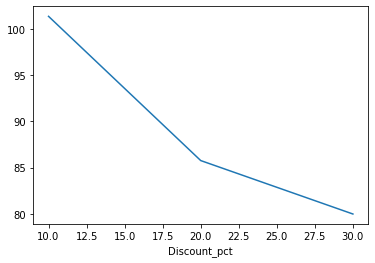

In [95]:
prod_level.groupby(['Discount_pct'])['Invoice_Amount'].mean().plot()

Sales by Category

In [96]:
sdf = data.pivot_table( index=['Transaction_ID','Product_SKU','Product_Category'], aggfunc='sum')

In [97]:
sdf["Invoice_Amount"] =  ((sdf['Quantity']* sdf['Avg_Price'])*(1 -(sdf['Discount_pct']*0.01) )*(1+sdf['GST']))+sdf['Delivery_Charges']

In [98]:
sdf

Avg_Price  CustomerID  \
Transaction_ID Product_SKU    Product_Category                          
16679          GGOENEBJ079499 Nest-USA             153.71       17850   
16680          GGOENEBJ079499 Nest-USA             153.71       17850   
16681          GGOEGFKQ020399 Office                 2.05       17850   
16682          GGOEGAAB010516 Apparel               17.53       17850   
               GGOEGBJL013999 Bags                  16.50       17850   
...                                                   ...         ...   
48493          GGOENEBB078899 Nest-USA             121.30       14410   
48494          GGOEGAEB091117 Apparel               48.92       14410   
48495          GGOENEBQ084699 Nest-USA             151.88       14410   
48496          GGOENEBQ079199 Nest-USA              80.52       14600   
48497          GGOENEBQ079099 Nest-USA              80.52       14600   

                                                Delivery_Charges  \
Transaction_ID Product_SKU    Product_Category                     
16679          GGOENEBJ079499 Nest-USA                      6.50   
16680          GGOENEBJ079499 Nest-USA                      6.50   
16681          GGOEGFKQ020399 Office                        6.50   
16682          GGOEGAAB010516 Apparel                       6.50   
               GGOEGBJL013999 Bags                          6.50   
...                                                          ...   
48493          GGOENEBB078899 Nest-USA                      6.50   
48494          GGOEGAEB091117 Apparel                       6.50   
48495          GGOENEBQ084699 Nest-USA                      6.50   
48496          GGOENEBQ079199 Nest-USA                      6.50   
48497          GGOENEBQ079099 Nest-USA                     19.99   

                                                Discount_pct   GST  \
Transaction_ID Product_SKU    Product_Category                       
16679          GGOENEBJ079499 Nest-USA                  10.0  0.10   
16680          GGOENEBJ079499 Nest-USA                  10.0  0.10   
16681          GGOEGFKQ020399 Office                    10.0  0.10   
16682          GGOEGAAB010516 Apparel                   10.0  0.18   
               GGOEGBJL013999 Bags                      10.0  0.18   
...                                                      ...   ...   
48493          GGOENEBB078899 Nest-USA                  30.0  0.10   
48494          GGOEGAEB091117 Apparel                   30.0  0.18   
48495          GGOENEBQ084699 Nest-USA                  30.0  0.10   
48496          GGOENEBQ079199 Nest-USA                  30.0  0.10   
48497          GGOENEBQ079099 Nest-USA                  30.0  0.10   

                                                Invoice_Amount  Quantity  \
Transaction_ID Product_SKU    Product_Category                             
16679          GGOENEBJ079499 Nest-USA               158.67290         1   
16680          GGOENEBJ079499 Nest-USA               158.67290         1   
16681          GGOEGFKQ020399 Office                   8.52950         1   
16682          GGOEGAAB010516 Apparel                 99.58430         5   
               GGOEGBJL013999 Bags                    24.02300         1   
...                                                        ...       ...   
48493          GGOENEBB078899 Nest-USA                99.90100         1   
48494          GGOEGAEB091117 Apparel                 46.90792         1   
48495          GGOENEBQ084699 Nest-USA               123.44760         1   
48496          GGOENEBQ079199 Nest-USA               316.50200         5   
48497          GGOENEBQ079099 Nest-USA               267.99160         4   

                                                Tenure_Months  year  
Transaction_ID Product_SKU    Product_Category                       
16679          GGOENEBJ079499 Nest-USA                     12  2019  
16680          GGOENEBJ079499 Nest-USA                     12  2019  
16681          GGOEGFKQ020399 Off

In [99]:
data.groupby(['Product_Category'])['Invoice_Amount'].sum()

Product_Category
Accessories             9.277126e+03
Android                 9.860494e+02
Apparel                 7.354504e+05
Bags                    1.688531e+05
Bottles                 9.309917e+03
Drinkware               2.402678e+05
Gift Cards              1.757481e+04
Headgear                5.345419e+04
Housewares              6.372834e+03
Lifestyle               1.145590e+05
Nest                    4.399770e+05
Nest-Canada             6.554575e+04
Nest-USA                2.351316e+06
Notebooks & Journals    1.093681e+05
Office                  3.440001e+05
Waze                    1.125057e+04
Name: Invoice_Amount, dtype: float64

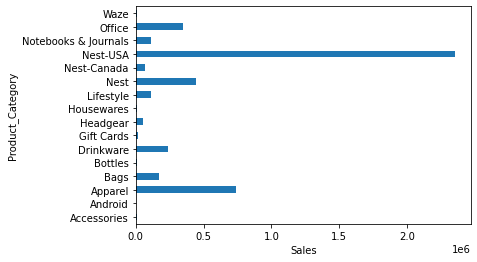

In [100]:
data.groupby(['Product_Category'])['Invoice_Amount'].sum().plot(kind='barh')
plt.xlabel("Sales")
plt.show()

Sales by Month 

In [101]:
data.groupby('Month')['Invoice_Amount'].sum()

Month
Apr    441974.38503
Aug    415699.17184
Dec    439530.03015
Feb    324330.66720
Jan    460087.03245
Jul    419784.20761
Jun    287125.25071
Mar    330923.97143
May    313637.96936
Nov    475482.19736
Oct    448939.11355
Sep    320048.22198
Name: Invoice_Amount, dtype: float64

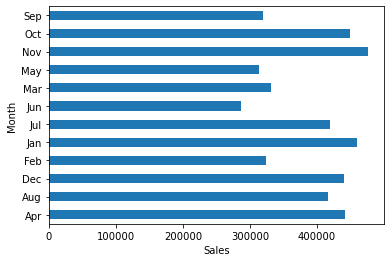

In [102]:
data.groupby('Month')['Invoice_Amount'].sum().plot(kind='barh')
plt.xlabel("Sales")
plt.show()

Calculate the Revenue, Marketing spend, percentage of marketing spend out of 
revenue, Tax, percentage of delivery charges by month. <br>




In [103]:
 market_spend.Date = pd.to_datetime(market_spend.Date)

In [104]:
market_spend['Month'] = market_spend.Date.dt.strftime('%b')

In [105]:
market_spend['Total_Spend'] = market_spend['Offline_Spend']+market_spend['Online_Spend']

In [106]:
market_spend.groupby('Month')['Total_Spend'].sum()

Month
Apr    157026.83
Aug    142904.15
Dec    198648.75
Feb    137107.92
Jan    154928.95
Jul    120217.85
Jun    134318.14
Mar    122250.09
May    118259.64
Nov    161144.96
Oct    151224.65
Sep    135514.54
Name: Total_Spend, dtype: float64

<AxesSubplot:ylabel='Month'>

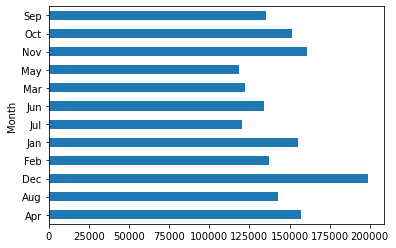

In [107]:
market_spend.groupby('Month')['Total_Spend'].sum().plot(kind='barh')

How marketing spend is impacting on revenue? 


In [108]:
pd.concat([market_spend.groupby('Month')['Total_Spend'].sum(), data.groupby('Month')['Invoice_Amount'].sum()],axis=1)

,Total_Spend,Invoice_Amount
Month,,
Apr,157026.83,441974.38503
Aug,142904.15,415699.17184
Dec,198648.75,439530.03015
Feb,137107.92,324330.66720
Jan,154928.95,460087.03245
Jul,120217.85,419784.20761
Jun,134318.14,287125.25071
Mar,122250.09,330923.97143
May,118259.64,313637.96936


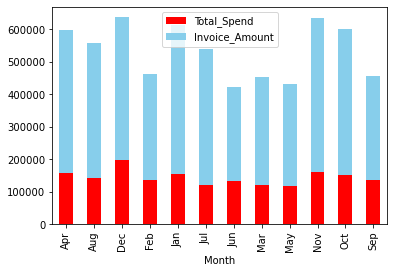

In [109]:
spend_reven = pd.concat([market_spend.groupby('Month')['Total_Spend'].sum(), data.groupby('Month')['Invoice_Amount'].sum()],axis=1)
#fig= plt.figure(figsize=(10,10))
spend_reven.plot(kind='bar', stacked=True, color=['red', 'skyblue'])
plt.show()

• Which product was appeared in the transactions?<br>


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52524 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  int64         
 1   Gender               52524 non-null  object        
 2   Location             52524 non-null  object        
 3   Tenure_Months        52524 non-null  int64         
 4   Transaction_ID       52524 non-null  int64         
 5   Transaction_Date     52524 non-null  datetime64[ns]
 6   Product_SKU          52524 non-null  object        
 7   Product_Description  52524 non-null  object        
 8   Product_Category     52524 non-null  object        
 9   Quantity             52524 non-null  int64         
 10  Avg_Price            52524 non-null  float64       
 11  Delivery_Charges     52524 non-null  float64       
 12  Coupon_Status        52524 non-null  object        
 13  Month                52524 non-

In [111]:
data.groupby(['Product_SKU'])['Transaction_ID'].count().reset_index().sort_values(by='Transaction_ID',ascending=False)

,Product_SKU,Transaction_ID
972,GGOENEBJ079499,3511
974,GGOENEBQ078999,3328
967,GGOENEBB078899,3230
975,GGOENEBQ079099,1361
980,GGOENEBQ084699,1089
...,...,...
1048,GGOEYAEB030016,1
1047,GGOEYAEB030014,1
528,GGOEGAHB057414,1
339,GGOEGADB059213,1


In [112]:
data.loc[data["Product_SKU"]=='GGOENEBJ079499','Product_Description'].head(1)

0    Nest Learning Thermostat 3rd Gen-USA - Stainle...
Name: Product_Description, dtype: object

*  *Nest Learning Thermostat 3rd Gen-USA - Stainless Steel* has been in many transaction


• Which product was purchased mostly based on the quantity?

In [113]:
data.groupby(['Product_SKU'])['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)

,Product_SKU,Quantity
906,GGOEGGOA017399,16234
874,GGOEGDHC018299,9728
851,GGOEGBMJ013399,7321
960,GGOEGOLC014299,6496
896,GGOEGFKQ020399,5847
...,...,...
1075,GGOEYAEJ029616,1
673,GGOEGATB060217,1
668,GGOEGARJ058416,1
89,GGOEAAEJ029314,1


* Maze Pen - has sold more numbers

# *Performing Customer Segmentation:*<br>

• Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, <br>
Standard customers and define strategy on the same. <br>
• Scientific (Using K-Means) & Understand the profiles. Define strategy for each <br>
segment.

## • Heuristic (Value based, RFM) 

Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same. <br> 

Recency     - Number Days from Last Transaction<br>
Frequency   - How many times customer has done transactions<br>
Monetary    - Money

In [114]:
data.head(1)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Coupon_Code,Discount_pct,Invoice_Amount,year
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,ELEC10,10.0,158.6729,2019


In [659]:
data.to_csv("Merged_Data.csv")

# Creating Customer Centric Data :

    1) Adding Invoice and Quantity. Invoice Amount - Monetary
    2) Counting number of Transaction - Frequency
    3) Finding Recent Transaction Date - Recency
    4) Product Category count, product sku count
    5) Discount Percent avg 

In [127]:
customer_df = data.groupby(['CustomerID'])['Quantity','Invoice_Amount'].sum().reset_index()

C:\Users\admin\AppData\Local\Temp\ipykernel_6324\2424288573.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_df = data.groupby(['CustomerID'])['Quantity','Invoice_Amount'].sum().reset_index()


In [128]:
prod_counts = data.groupby(['CustomerID'])['Product_SKU'].count().reset_index()

In [129]:
customer_df = pd.merge(customer_df, prod_counts,how='inner', on ='CustomerID')


In [130]:
prod_cat_counts = data.groupby(['CustomerID'])['Product_Category'].nunique().reset_index()

In [131]:
customer_df = pd.merge(customer_df, prod_cat_counts,how='inner', on ='CustomerID')

In [132]:
cust_date_df = data.groupby('CustomerID').Transaction_Date.max()

In [133]:
customer_df = pd.merge(customer_df, cust_date_df,how='inner', on ='CustomerID')

In [134]:
customer_df["Recency"] = datetime.strptime('2020-01-01', '%Y-%m-%d') - customer_df.Transaction_Date

In [135]:
customer_df= pd.merge(customer_df, data.groupby(['CustomerID'])['Discount_pct'].mean().reset_index(),on='CustomerID')

In [138]:
transaction_count = data.groupby(['CustomerID'])['Transaction_ID'].count().reset_index()

In [141]:
customer_df= pd.merge(customer_df, data.groupby(['CustomerID'])['Transaction_ID'].count().reset_index(),on='CustomerID')

In [142]:
customer_df

,CustomerID,Quantity,Invoice_Amount,Product_SKU,Product_Category,Transaction_Date,Recency,Discount_pct,Transaction_ID
0,12346,3,174.98174,2,2,2019-09-15,108 days,30.000000,2
1,12347,340,12059.17780,59,9,2019-11-02,60 days,25.084746,59
2,12348,209,1501.92620,23,6,2019-10-19,74 days,24.782609,23
3,12350,21,1183.71394,17,4,2019-12-14,18 days,30.000000,17
4,12356,56,1753.45086,36,7,2019-09-15,108 days,30.000000,36
...,...,...,...,...,...,...,...,...,...
1463,18259,45,789.15360,6,3,2019-04-05,271 days,10.000000,6
1464,18260,128,2573.65633,39,10,2019-10-05,88 days,22.051282,39
1465,18269,10,155.66092,8,2,2019-06-20,195 days,12.500000,8
1466,18277,2,301.02000,1,1,2019-10-23,70 days,10.000000,1


In [143]:
## Renaming the variables 

customer_df.rename(columns={'Transaction_ID' : "Frequency",'Invoice_Amount':'Monetary',"Product_Category":"Prod_Cat_Count","Product_SKU":"Product_SKU_Count"},inplace=True)
customer_df.Recency =customer_df.Recency.dt.days.astype('int16')

In [144]:
customer_df.head(2)

,CustomerID,Quantity,Monetary,Product_SKU_Count,Prod_Cat_Count,Transaction_Date,Recency,Discount_pct,Frequency
0,12346,3,174.98174,2,2,2019-09-15,108,30.000000,2
1,12347,340,12059.17780,59,9,2019-11-02,60,25.084746,59


### Creating Quantiles 

In [145]:
quantiles = customer_df[['Frequency','Monetary','Recency' ]].quantile(q=[0.25,0.5,0.75])
quantiles

,Frequency,Monetary,Recency
0.25,10.0,664.364045,56.0
0.50,21.0,1770.545200,132.0
0.75,45.0,3911.871905,221.0


In [146]:
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 10.0, 0.5: 21.0, 0.75: 45.0},
 'Monetary': {0.25: 664.364045, 0.5: 1770.5452, 0.75: 3911.871905},
 'Recency': {0.25: 56.0, 0.5: 132.0, 0.75: 221.0}}

In [147]:
#We create two classes for the RFM segmentation since, being high recency is bad, while high frequency and monetary value is good.
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [148]:
customer_df['R_Quantile'] = customer_df['Recency'].apply(RClass, args=('Recency',quantiles,))
customer_df['F_Quantile'] = customer_df['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
customer_df['M_Quantile'] = customer_df['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [149]:
customer_df

,CustomerID,Quantity,Monetary,Product_SKU_Count,Prod_Cat_Count,Transaction_Date,Recency,Discount_pct,Frequency,R_Quantile,F_Quantile,M_Quantile
0,12346,3,174.98174,2,2,2019-09-15,108,30.000000,2,2,4,4
1,12347,340,12059.17780,59,9,2019-11-02,60,25.084746,59,2,1,1
2,12348,209,1501.92620,23,6,2019-10-19,74,24.782609,23,2,2,3
3,12350,21,1183.71394,17,4,2019-12-14,18,30.000000,17,1,3,3
4,12356,56,1753.45086,36,7,2019-09-15,108,30.000000,36,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,18259,45,789.15360,6,3,2019-04-05,271,10.000000,6,4,4,3
1464,18260,128,2573.65633,39,10,2019-10-05,88,22.051282,39,2,2,2
1465,18269,10,155.66092,8,2,2019-06-20,195,12.500000,8,3,4,4
1466,18277,2,301.02000,1,1,2019-10-23,70,10.000000,1,2,4,4


In [150]:
hueristic_df=customer_df.assign(R_seg=np.nan, FM_seg =np.nan)

In [151]:
customer_df.assign(R_seg=np.nan, FM_seg =np.nan)

,CustomerID,Quantity,Monetary,Product_SKU_Count,Prod_Cat_Count,Transaction_Date,Recency,Discount_pct,Frequency,R_Quantile,F_Quantile,M_Quantile,R_seg,FM_seg
0,12346,3,174.98174,2,2,2019-09-15,108,30.000000,2,2,4,4,NaN,NaN
1,12347,340,12059.17780,59,9,2019-11-02,60,25.084746,59,2,1,1,NaN,NaN
2,12348,209,1501.92620,23,6,2019-10-19,74,24.782609,23,2,2,3,NaN,NaN
3,12350,21,1183.71394,17,4,2019-12-14,18,30.000000,17,1,3,3,NaN,NaN
4,12356,56,1753.45086,36,7,2019-09-15,108,30.000000,36,2,2,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,18259,45,789.15360,6,3,2019-04-05,271,10.000000,6,4,4,3,NaN,NaN
1464,18260,128,2573.65633,39,10,2019-10-05,88,22.051282,39,2,2,2,NaN,NaN
1465,18269,10,155.66092,8,2,2019-06-20,195,12.500000,8,3,4,4,NaN,NaN
1466,18277,2,301.02000,1,1,2019-10-23,70,10.000000,1,2,4,4,NaN,NaN


In [152]:

hueristic_df.R_seg[customer_df['R_Quantile']==4] = "3-Churn"
hueristic_df.R_seg[customer_df['R_Quantile']==2] = "2-At Risk"
hueristic_df.R_seg[customer_df['R_Quantile']==3] = "2-At Risk"
hueristic_df.R_seg[customer_df['R_Quantile']==1] = "1-Active"
hueristic_df.R_seg[customer_df['R_Quantile']==1] = "1-Active"

hueristic_df.FM_seg[(customer_df['F_Quantile']==3) & (customer_df['M_Quantile']==1)] = "2-Gold"
hueristic_df.FM_seg[(customer_df['F_Quantile']==4) & (customer_df['M_Quantile']==1)] = "2-Gold"
hueristic_df.FM_seg[(customer_df['F_Quantile']==2) & (customer_df['M_Quantile']==2)] = "2-Gold"
hueristic_df.FM_seg[(customer_df['F_Quantile']==2) & (customer_df['M_Quantile']==1)] = "2-Gold"
hueristic_df.FM_seg[(customer_df['F_Quantile']==3) & (customer_df['M_Quantile']==2)] = "2-Gold"
hueristic_df.FM_seg[(customer_df['F_Quantile']==4) & (customer_df['M_Quantile']==2)] = "1-Silver"
hueristic_df.FM_seg[(customer_df['F_Quantile']==1) & (customer_df['M_Quantile']==3)] = "2-Gold"
hueristic_df.FM_seg[(customer_df['F_Quantile']==2) & (customer_df['M_Quantile']==3)] = "2-Gold"
hueristic_df.FM_seg[(customer_df['F_Quantile']==3) & (customer_df['M_Quantile']==3)] = "1-Silver"
hueristic_df.FM_seg[(customer_df['F_Quantile']==4) & (customer_df['M_Quantile']==3)] = "1-Silver"
hueristic_df.FM_seg[(customer_df['F_Quantile']==1) & (customer_df['M_Quantile']==4)] = "2-Gold"
hueristic_df.FM_seg[(customer_df['F_Quantile']==1) & (customer_df['M_Quantile']==2)] = "2-Gold"
hueristic_df.FM_seg[(customer_df['F_Quantile']==2) & (customer_df['M_Quantile']==4)] = "1-Silver"
hueristic_df.FM_seg[(customer_df['F_Quantile']==3) & (customer_df['M_Quantile']==4)] = "1-Silver"
hueristic_df.FM_seg[(customer_df['F_Quantile']==4) & (customer_df['M_Quantile']==4)] = "0-Standard"

hueristic_df.FM_seg.fillna("4-Premium", inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_6324\820821914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hueristic_df.R_seg[customer_df['R_Quantile']==4] = "3-Churn"
C:\Users\admin\AppData\Local\Temp\ipykernel_6324\820821914.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hueristic_df.FM_seg[(customer_df['F_Quantile']==3) & (customer_df['M_Quantile']==1)] = "2-Gold"


In [153]:
hueristic_df

,CustomerID,Quantity,Monetary,Product_SKU_Count,Prod_Cat_Count,Transaction_Date,Recency,Discount_pct,Frequency,R_Quantile,F_Quantile,M_Quantile,R_seg,FM_seg
0,12346,3,174.98174,2,2,2019-09-15,108,30.000000,2,2,4,4,2-At Risk,0-Standard
1,12347,340,12059.17780,59,9,2019-11-02,60,25.084746,59,2,1,1,2-At Risk,4-Premium
2,12348,209,1501.92620,23,6,2019-10-19,74,24.782609,23,2,2,3,2-At Risk,2-Gold
3,12350,21,1183.71394,17,4,2019-12-14,18,30.000000,17,1,3,3,1-Active,1-Silver
4,12356,56,1753.45086,36,7,2019-09-15,108,30.000000,36,2,2,3,2-At Risk,2-Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,18259,45,789.15360,6,3,2019-04-05,271,10.000000,6,4,4,3,3-Churn,1-Silver
1464,18260,128,2573.65633,39,10,2019-10-05,88,22.051282,39,2,2,2,2-At Risk,2-Gold
1465,18269,10,155.66092,8,2,2019-06-20,195,12.500000,8,3,4,4,2-At Risk,0-Standard
1466,18277,2,301.02000,1,1,2019-10-23,70,10.000000,1,2,4,4,2-At Risk,0-Standard


In [154]:
#Profiling
Profiling=hueristic_df.groupby(['R_seg', 'FM_seg'])['Quantity','Monetary','Product_SKU_Count','Prod_Cat_Count','Frequency','Recency','Discount_pct'].mean().apply(lambda x : np.round(x,2))

C:\Users\admin\AppData\Local\Temp\ipykernel_6324\402052241.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Profiling=hueristic_df.groupby(['R_seg', 'FM_seg'])['Quantity','Monetary','Product_SKU_Count','Prod_Cat_Count','Frequency','Recency','Discount_pct'].mean().apply(lambda x : np.round(x,2))


In [155]:
Profiling

Quantity  Monetary  Product_SKU_Count  Prod_Cat_Count  \
R_seg     FM_seg                                                              
1-Active  0-Standard     12.68    324.20               4.50            2.53   
          1-Silver       34.22   1084.65              13.26            4.50   
          2-Gold        122.55   2927.22              30.30            6.56   
          4-Premium     557.59  11232.18             114.35            9.70   
2-At Risk 0-Standard     14.01    237.78               4.60            2.56   
          1-Silver       60.21    982.29              13.40            4.70   
          2-Gold        136.89   2713.97              34.34            7.01   
          4-Premium     421.59   8242.75              95.23            9.47   
3-Churn   0-Standard     15.76    233.93               3.56            2.17   
          1-Silver       47.94   1069.56              12.94            4.31   
          2-Gold        152.66   2780.29              30.63            6.10   
          4-Premium     451.02   7980.39              77.68            8.51   

                      Frequency  Recency  Discount_pct  
R_seg     FM_seg                                        
1-Active  0-Standard       4.50    21.42         27.74  
          1-Silver        13.26    25.25         26.07  
          2-Gold          30.30    27.73         22.72  
          4-Premium      114.35    27.46         21.45  
2-At Risk 0-Standard       4.60   141.54         20.03  
          1-Silver        13.40   137.59         20.49  
          2-Gold          34.34   131.41         19.92  
          4-Premium       95.23   120.63         18.85  
3-Churn   0-Standard       3.56   288.82         16.11  
          1-Silver        12.94   290.81         16.59  
          2-Gold          30.63   283.41         17.81  
          4-Premium       77.68   300.74         17.33

### <font color ='Orange'> Strategies</font>: 
    1) **Cross-Selling** for all Customers
    2) **Retention Campaign** for At Risk  Silver Gold and Premium Customers
    3) **Win back campaign** targetting Churn - Premium , GOld and Silver Customers
    4) **Persnoalised offers**  -> Churn Premium customers. 

In [157]:
customer_df.to_csv("customer_df1.csv")

In [156]:
customer_df

,CustomerID,Quantity,Monetary,Product_SKU_Count,Prod_Cat_Count,Transaction_Date,Recency,Discount_pct,Frequency,R_Quantile,F_Quantile,M_Quantile
0,12346,3,174.98174,2,2,2019-09-15,108,30.000000,2,2,4,4
1,12347,340,12059.17780,59,9,2019-11-02,60,25.084746,59,2,1,1
2,12348,209,1501.92620,23,6,2019-10-19,74,24.782609,23,2,2,3
3,12350,21,1183.71394,17,4,2019-12-14,18,30.000000,17,1,3,3
4,12356,56,1753.45086,36,7,2019-09-15,108,30.000000,36,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,18259,45,789.15360,6,3,2019-04-05,271,10.000000,6,4,4,3
1464,18260,128,2573.65633,39,10,2019-10-05,88,22.051282,39,2,2,2
1465,18269,10,155.66092,8,2,2019-06-20,195,12.500000,8,3,4,4
1466,18277,2,301.02000,1,1,2019-10-23,70,10.000000,1,2,4,4
